Assignment 3

Daniel Scanks
V00788200

Q1: Lag correlations of weather time series

1) From the hourly time series at Deep Cove (dc), calculate the lag correlation co-efficient ρxx(τ) out to a lag of τ=30 days (Remember this data is hourly!). (also remember to remove the mean of dc before trying to do the calculations).
Comment on the resulting plot.


2) Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer). Make sure to indicate which lag correlation is which on the plots.
Comment below on the different charcter of these two lag correlations.

<IPython.core.display.Javascript object>


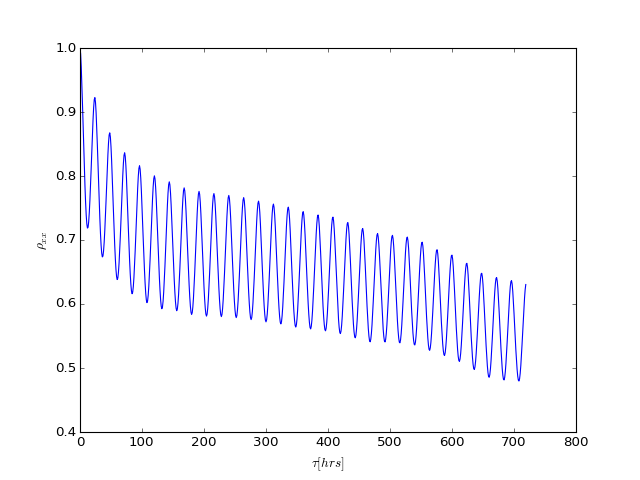

<IPython.core.display.Javascript object>


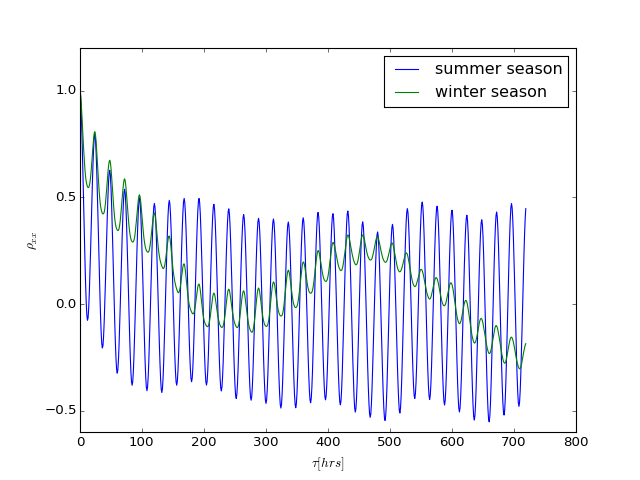

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
laghours = 30*24
dc = hourdata[0,:] 
dc= dc[~np.isnan(dc)] #to fix nan error on mean calculation
jb=hourdata[1,:]

                                        #1)
meandc = np.mean(dc)
dc = dc - meandc  #removing mean of dc
lag = range(0,laghours) # the lags are integer numbers of hours
cxx= meandc*np.array(lag)


for ind,tau in enumerate(lag):
    if tau==0:
        cxx[ind]=np.mean(dc*dc)
    else:
        cxx[ind]=np.mean(dc[:-tau]*dc[tau:])
                
pxx = cxx/(np.std(dc)*np.std(dc))                   #lag correlation coefficient 


fig =plt.figure(figsize = (8,6))                     #can see that pxx(0)=1. overall (over 30 days) the lag correlation 
ax= fig.add_subplot(1,1,1)                           #coeff decreases with increasing Tau. However, there is also a daily trend 
ax.plot(lag,pxx)                                     # where correlation increases and decreases sharply and continously  
ax.set_xlabel(r'$\tau [hrs]$')                       # Which could represent the daily temp fluctuations relationship with lag. 
ax.set_ylabel(r'$\rho_{xx}$')





                                     #2)

dc = hourdata[0,:] 
dc= dc[~np.isnan(dc)] 

daysbeforenov = 31+28+31+30+31+30+31+31+30+31            
hoursbeforenov = 24*daysbeforenov
hoursafterjan = hoursbeforenov + (24*(30+31+31))          
dcwinter = dc[hoursbeforenov:hoursafterjan:]               #starts in jan, want winter months Nov, Dec, Jan (2nd one in data)
dcwinter = dcwinter - np.mean(dcwinter)

hoursbeforejune = (31+28+31+30+31)*24
hoursafteraugust = hoursbeforejune + ((30+31+31)*24)      #considering summer months as june,july,august
dcsummer = dc[hoursbeforejune:hoursafteraugust:]
dcsummer = dcsummer - np.mean(dcsummer)

cxxsumm = 0.*np.array(lag)
cxxwint = 0.*np.array(lag)

for ind,tau in enumerate(lag):
    if tau==0:
        cxxsumm[ind]=np.mean(dcsummer*dcsummer)
        cxxwint[ind]=np.mean(dcwinter*dcwinter)
    else:
        cxxsumm[ind]=np.mean(dcsummer[:-tau]*dcsummer[tau:])
        cxxwint[ind]=np.mean(dcwinter[:-tau]*dcwinter[tau:])

pxxsummer = cxxsumm/(np.std(dcsummer)*np.std(dcsummer))
pxxwinter = cxxwint/(np.std(dcwinter)*np.std(dcwinter))
    
        
fig,ax=plt.subplots(1,1,)                        #the winter season shows high varience in  fluctuations for pxx (related to high 
ax.plot(lag,pxxsummer,label='summer season')     #daily temp variance) but over the months the general trend does not change much   
ax.plot(lag,pxxwinter,label='winter season')     #(slight decrease). In the summer the pxx fluctuates less due to more stable daily 
ax.set_xlabel(r'$\tau [hrs]$')                   # temps but the overall  trend changes more due to lag (decreases, then  
ax.set_ylabel(r'$\rho_{xx}$')                    # increases, and then decreases again).
ax.legend()


Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.


1) Consider the process x(t)=∫tt−by(t) dt where y(t) is uncorrelated white noise so that Ryy(τ)=δ(τ). Using the definition of Rxx(τ), and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function:
Rxx(τ)={b−|τ| when |τ|<b
       {  0 when   |τ|≥b

2) Show emperically that you have the right lag auto correlation by computing the lag correlation of a random discrete timeseries x(t).
Hint: have a look at np.convolve to do the integration.
Hint 2: Make sure your time series is long enough to get a nice representation of Rxx(τ). Show what happens if N is too small and what happens if it gets larger. To do this well, I used N in [500, 5000, 50000, 5e6], but my machine has a good amount of memory. Don't test on the bigger values, as it is slow, just add them for the final product!

1)Ans: Can see that Rxx has a maximum value when tau is zero. At this point Rxx=b. As tau increases or decreases, the value of Rxx decreases linearly with respect to tau (Rxx = b-abs(tau)) when tau is larger than or equal to b, the value of Rxx is a constant zero. The point of the triangle occurs at point (0,b) then symmetrically and linearly dereases on each side of the point with slope -1 down to the ponts (-b,0) and (b,0). These two points, and any other point with an absolute(tau-value) greater than b will show non-correlated Rxx values(all zero). The base of the triangle (not defined by function) is the x-axis(tau axis) between -b and b.

<IPython.core.display.Javascript object>


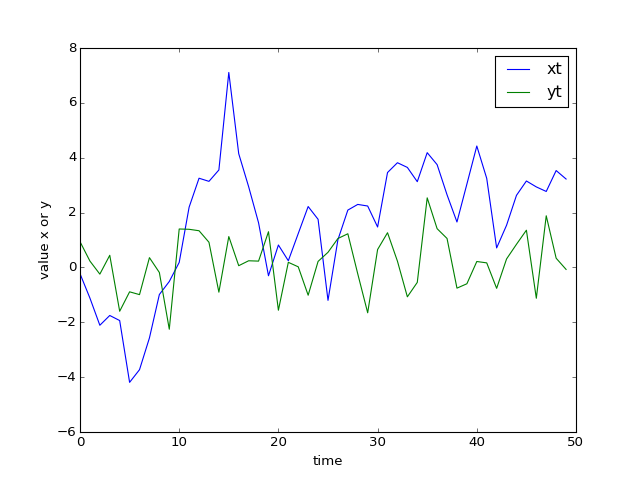

<IPython.core.display.Javascript object>


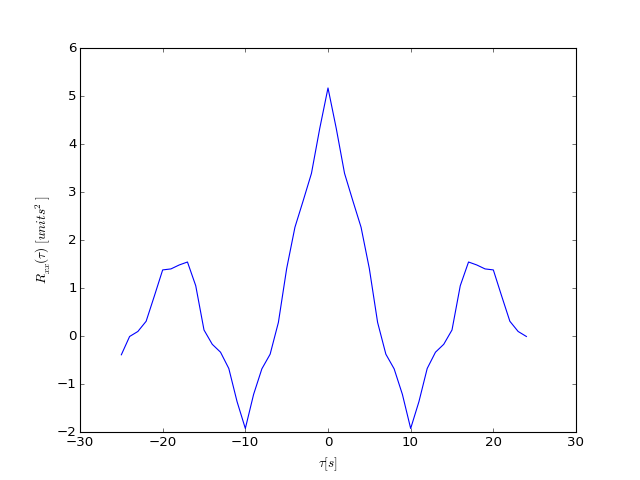

<IPython.core.display.Javascript object>


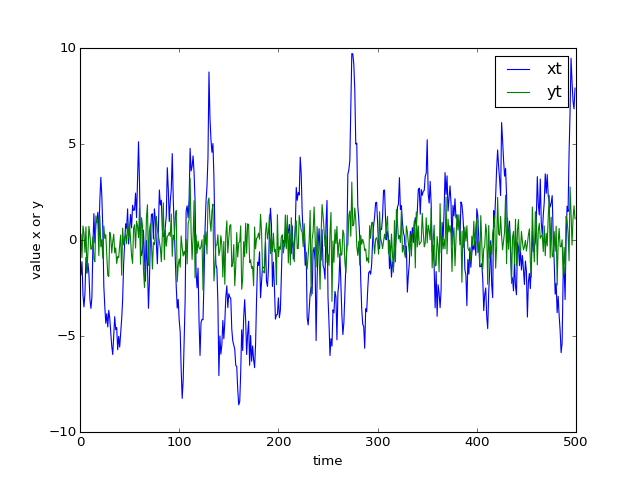

<IPython.core.display.Javascript object>


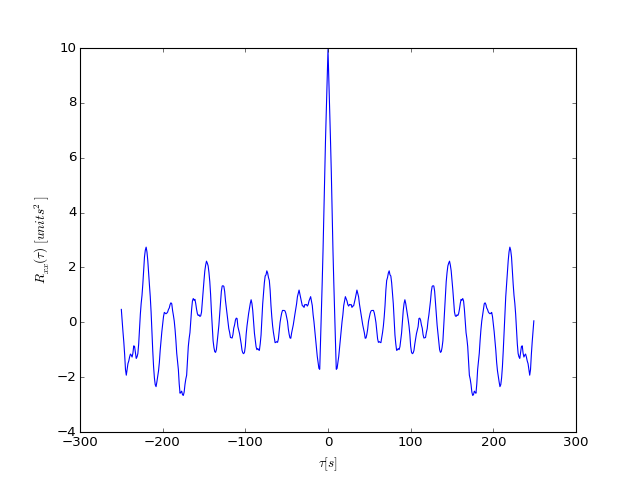

<IPython.core.display.Javascript object>


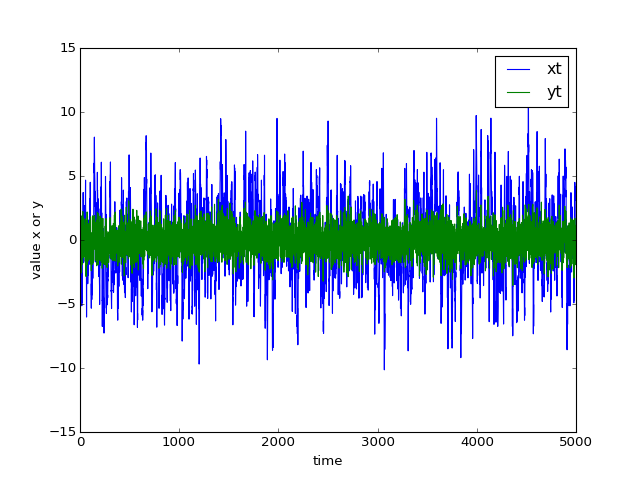

<IPython.core.display.Javascript object>


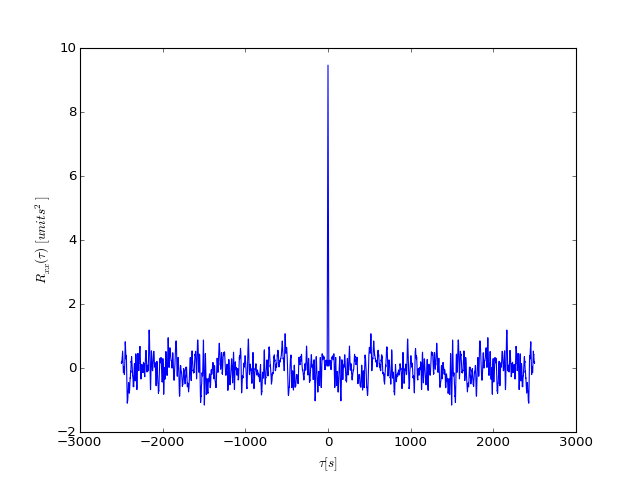

<IPython.core.display.Javascript object>


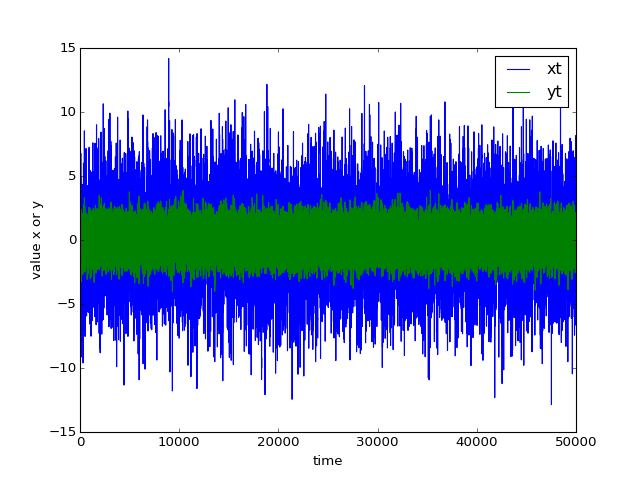

<IPython.core.display.Javascript object>


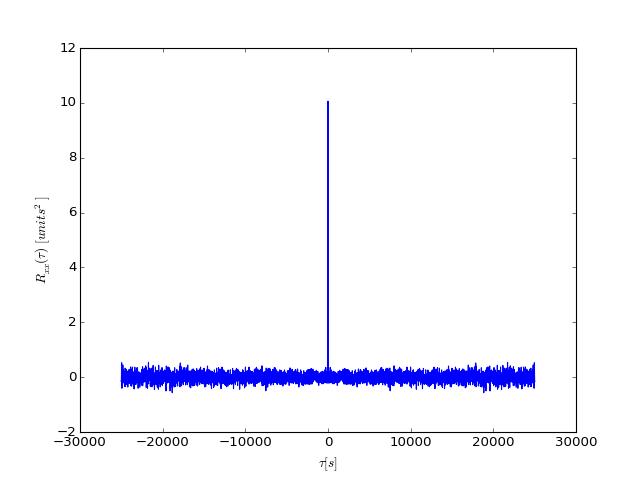

In [1]:
#2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

for N in [50,500,5000,50000]:
    t =np.arange(N)
    b=10
    yt=np.random.randn(N)  #uncorrelated white noise
    at=np.ones(b); 

    xt=np.convolve(yt,at,mode='same')

    fig,ax=plt.subplots(1,1,)
    ax.plot(t,xt,label='xt')
    ax.plot(t,yt,label='yt')
    ax.set_xlabel('time')
    ax.set_ylabel('value x or y')
    ax.legend()


    xt= xt-np.mean(xt)
    lags = range(-N/2,N/2)
    Rxx = np.zeros(len(lags))
    for num,lag in enumerate(lags):
        if lag>0:
            Rxx[num]= np.mean(xt[lag:]*xt[:-lag] )
        elif lag<0:
            Rxx[num]= np.mean(xt[-lag:]*xt[:lag] )
        else:
            Rxx[num]= np.mean(xt*xt)

    tau = np.array(lags)*np.median(np.diff(t))     
    fig,ax=plt.subplots()
    ax.plot(tau,(Rxx))
    ax.set_xlabel(r'$\tau [s]$')                  #can see that auto lag correlation is correct, represents triangle function
    ax.set_ylabel(r'$R_{xx}(\tau)\ [units^2]$')








3) Derive (or look up) Sxx(f) of this process:

3)ans: Sxx of triangle function (looked up): (sin(pi*f)/pi*f)^2 = sinc^2(f)

4) Demonstrate with finite values of T that limT−>∞Sxx(f,T)=Sxx(f) does not converge to Sxx(f). Do this by taking longer values of T, fitting to the same set of f, and graphically showing that the spectral estimate does not improve. (Do not use canned fft routines, unless you prove they work first.)
Hints:
When you choose your discrete values of f, make sure you don't choose them to be too high (i.e. if you define Δt=1 s in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code. To do this, you would do something like:
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on

    # Your code in here
    return X # where X is your Fourier tranform
Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
use ax.loglog(f,X) to make your plots. We almost always plot spectra using loglog.

<IPython.core.display.Javascript object>


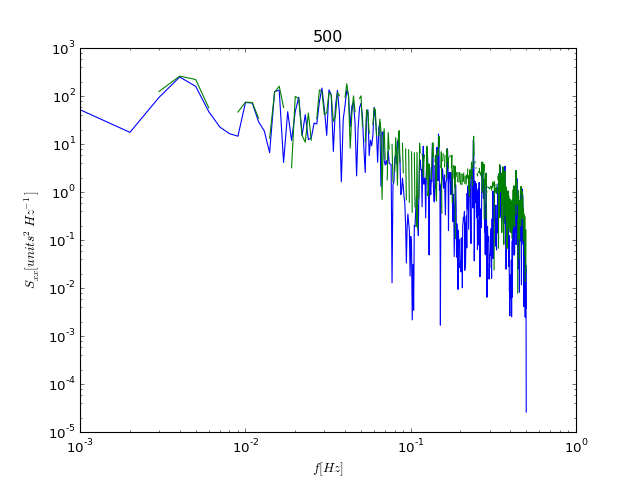

C:\Users\Daniel\Anaconda\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


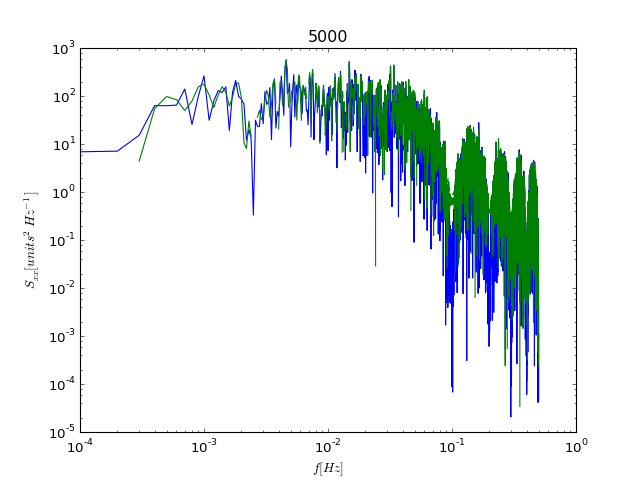

In [1]:
#4)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

for N in [500,5000,50000]:
    
    f = np.linspace(0,0.5,N)
    t =np.arange(N)
    b=10
    yt=np.random.randn(N)  
    at=np.ones(b); 

    xt=np.convolve(yt,at,mode='same')
    xt= xt-np.mean(xt)
    lags = range(-N/2,N/2)
    Rxx = np.zeros(len(lags))
    for num,lag in enumerate(lags):
        if lag>0:
            Rxx[num]= np.mean(xt[lag:]*xt[:-lag] )
        elif lag<0:
            Rxx[num]= np.mean(xt[-lag:]*xt[:lag] )
        else:
            Rxx[num]= np.mean(xt*xt)

    tau = np.array(lags)*np.median(np.diff(t)) 
    
    Sxx =1j*f*0.
    dtau = np.median(np.diff(tau))
    for num,ff in enumerate(f):
        Sxx[num] = np.sum(Rxx*np.exp(1j*2.*np.pi* tau*ff)*dtau)   #for Sxx(f)
    
    
    
    
    
    
    X =1j*f*0.
    T = t[-1]-t[0] # get the sampling interval     
    dt = 1
    for num,ff in enumerate(f):
        X[num] = np.sum(xt*np.exp(-1j*2.*np.pi*t*ff)*dt)     #for Sxx(f,T)
    Sxxnew = X*np.conj(X)/T
   
    fig,ax=plt.subplots()
    ax.loglog(f[f>0],Sxxnew[f>0], label='Sxx(f,T)')
    ax.loglog(f[f>0],Sxx[f>0],label='Sxx(f)')
    ax.set_title(N)
    ax.set_xlabel(r'$f [Hz]$')
    ax.set_ylabel(r'$S_{xx} [units^2 Hz^{-1}]$')

5) Now demonstrate that the expected value of
E[limT−>∞Sxx(f,T)]
approaches Sxx(f) by averaging a number of your moderate lengthed spectral estimates together. Comment on the form of the spectrum relative to how you made the timeseries.
Hints:
Just do what you did above, but average the results of navg non-overlapping segments of data.
This gets computationally expensive, I did navg of 1, 5, 50, 100 and got nice results. Test your code on just navg of 1 and 5, and when its working add the higher numbers.

In [18]:
#5)

def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]
import scipy


#navg1= xt

xt5= split_list(xt, wanted_parts=5)     #splitting up and averaging x(t)
navg5= sum(scipy.array(xt5))/5
print navg5

xt50 = split_list(xt, wanted_parts=50)
navg50 = sum(scipy.array(xt50))/50

xtonehundred = split_list(xt, wanted_parts=100)
navg100= sum(scipy.array(xt100))/100

xt = navg5                                          #navg1 can be seen in question 2-4 where N=500. Did not run navg50,navg100



N=1000   #moderate length
f = np.linspace(0,0.5,N) 
lags = range(-N/2,N/2)
Rxx = np.zeros(len(lags))
for num,lag in enumerate(lags):
    if lag>0:
        Rxx[num]= np.mean(xt[lag:]*xt[:-lag] )
    elif lag<0:
        Rxx[num]= np.mean(xt[-lag:]*xt[:lag] )
    else:
        Rxx[num]= np.mean(xt*xt)

tau = np.array(lags)*np.median(np.diff(t)) 
    
Sxx =1j*f*0.
dtau = np.median(np.diff(tau))
for num,ff in enumerate(f):
    Sxx[num] = np.sum(Rxx*np.exp(1j*2.*np.pi* tau*ff)*dtau)   #for Sxx(f)
    
    
    
    
   
t= np.linspace(0,1000,1000)    
X =1j*f*0.
T = t[-1]-t[0] # get the sampling interval     
dt = 1
for num,ff in enumerate(f):
    X[num] = np.sum(xt*np.exp(-1j*2.*np.pi*t*ff)*dt)     #for Sxx(f,T)
Sxxnew = X*np.conj(X)/T
   
fig,ax=plt.subplots()
ax.loglog(f[f>0],Sxxnew[f>0], label='Sxx(f,T)')
ax.loglog(f[f>0],Sxx[f>0],label='Sxx(f)')
ax.set_title(N)
ax.set_xlabel(r'$f [Hz]$')
ax.set_ylabel(r'$S_{xx} [units^2 Hz^{-1}]$')


[]


<IPython.core.display.Javascript object>

ValueError: Data has no positive values, and therefore can not be log-scaled.